<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 02: Multicollinearity

### __Gül İnan__<br><br>Istanbul Technical University

## Multicollinearity

Remember that we defined the `multiple linear regression model` in the **matrix form**:


\begin{equation}
\mathbf{y}=\mathbf{X}\boldsymbol{\theta} + \boldsymbol{\epsilon}, \nonumber
\end{equation}

where $\textbf{y} \in \mathbb{R}^{n \times 1}$, $\textbf{X} \in \mathbb{R}^{n \times (d+1)}$, $\boldsymbol{\theta} \in \mathbb{R}^{(d+1) \times 1}$, and  $\boldsymbol{\epsilon} \in \mathbb{R}^{n \times 1}$.

Regression models are used for a wide variety of applications. However, a serious problem
that may dramatically impact the usefulness of a regression model is `near-linear dependence among the feature variables`, in other words, `multicollinearity`. 


For now, let's omit (ignore) the first column of $\textbf{X}$ (e.g., the column of 1's):

$$
\textbf{X} = \begin{bmatrix}
x_{11} & \ldots & x_{1j} & \ldots & x_{1d} \\
x_{21} & \ldots & x_{2j} & \ldots & x_{2d} \\
\vdots & \vdots &    \vdots    &  \vdots      &  \vdots\\
x_{n1} & \ldots & x_{nj} & \ldots & x_{nd} \\
\end{bmatrix}=[\mathbf{X}_1,\ldots, \mathbf{X}_j, \ldots, \mathbf{X}_d],
$$

and let $j$th column of $\mathbf{X}$ feature matrix denoted by $\mathbf{X}_j$ so that $\mathbf{X}=[\mathbf{X}_1,\ldots, \mathbf{X}_j, \ldots, \mathbf{X}_d]$. Thus, the column vector $\mathbf{X}_j$ contains the $n$ levels of the $j$th feature.

We may formally define `perfect multicollinearity` in terms of the `linear dependence of the columns` of $\textbf{X}$. The vectors $\mathbf{X}_1, \mathbf{X}_2, \ldots, \mathbf{X}_d$ are `linearly dependent`  if there exist scalars $a_{1},a_{2}, \ldots,a_{d}$, not all zero, such that:

$$
a_{1}\cdot \mathbf{X}_1 + a_{2}\cdot \mathbf{X}_2 + \ldots + a_{j}\cdot\mathbf{X}_j+ \ldots+ a_{d}\cdot\mathbf{X}_d = \mathbf{0}.
$$

This implies that at least one of the scalars is non-zero, say $a_{1} \neq 0$, and the above equation is able to be written as:

$$
\mathbf{X}_1 = \frac{-a_{2}}{a_{1}} \cdot \mathbf{X}_2 + \ldots  +\frac{-a_{j}}{a_{1}}\cdot\mathbf{X}_j+ \ldots+ \frac{-a_{d}}{a_{1}}\cdot\mathbf{X}_d,
$$

for $d>1$. Thus, a set of vectors is linearly dependent if and only if one of them is a **linear combination of the others**. The vectors $\mathbf{X}_1, \mathbf{X}_2, \ldots, \mathbf{X}_d$ are said to be `linearly independent` if they are not linearly dependent, that is, if the equation:

$$
a_{1}\cdot \mathbf{X}_1 + a_{2}\cdot \mathbf{X}_2 + \ldots + a_{j}\cdot\mathbf{X}_j+ \ldots+ a_{d}\cdot\mathbf{X}_d = \mathbf{0}.
$$

can only be satisfied by $a_{j}=0$ for $i=1,2,\ldots,n$. This implies that no vector in can be represented as a linear combination of the remaining vectors.

If the equation (4) above **holds exactly** for a subset of the columns of $\mathbf{X}$, then the column rank of $\mathbf{X}$ will be less than $d$, and, in turn, the rank of the $d \times d$ symmetric $\mathbf{X^TX}$
matrix will be less than $d$. This implies that at least one of the eigenvalues of $\mathbf{X}^{T}\mathbf{X}$ is equal to zero, then the determinant of the matrix $\mathbf{X}^{T}\mathbf{X}$ is 0 and it is singular.  Therefore the square matrix $\mathbf{X}^{T}\mathbf{X}$ cannot be inverted ($\mathbf{X^TX}^{-1}$ does not exist). 

However, suppose that the equation (4) is
**approximately true for some subset of the columns** of $\mathbf{X}$. Then there will be a `near-linear dependency` in the columns of $\mathbf{X}$ and the problem of `multicollinearity` is said to exist. When multicollinearity is present, 
the column rank of $\mathbf{X}$ and, in turn, the rank of $\mathbf{X}^{T}\mathbf{X}$ is still $d$, but some of the eigenvalues of $\mathbf{X^TX}$
will be very small, hence the determinant of the matrix $\mathbf{X}^{T}\mathbf{X}$ will be close to 0 (almost singular).
Thus, the matrix $\mathbf{X^TX}$ matrix will be `ill-conditioned`. 

When the determinant of matrix $\mathbf{X}^{T}\mathbf{X}$ is close to zero, the elements of the inverse matrix $(\mathbf{X}^{T}\mathbf{X})^{-1}$ get very large in magnitude.

## Effects of Multicollinearity

Multicollinearity tends to produce least-squares estimates $\hat{\boldsymbol{\theta}}_{OLS}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{Y}$ that are **too
large in absolute value** (and **large standard errors**). 

However, the fitted model may still produce satisfactory predictions. This can occur because the linear
combination $\sum_{j=0}^d \theta_j \cdot x_{ij}=\boldsymbol{\theta}^\top \textbf{x}_i$ may be estimated quite well, even though the individual
parameters $\theta_j$ are estimated poorly. 

## Multicollinearity Diagnostics

Several techniques have been proposed for detecting multicollinearity. We will now
discuss and illustrate some of these diagnostic measures. Desirable characteristics
of a diagnostic procedure are that it directly reflect the degree of the multicollinearity
problem and provide information helpful in determining which features are
involved multicollinearity.

### Examination of the Correlation Matrix

A first simple measure of multicollinearity is inspection of the off-diagonal elements of the symmetric `sample correlation matrix`
$\textbf{R}  \in \mathbb{R}^{d \times d}$ which measures the `sample correlation coefficient` between $d$ **numerical features**:


$$ 
\textbf{R} = \begin{bmatrix}
1 & r_{12} & \ldots & r_{1d} \\
r_{12} & 1 & \ldots & r_{2d} \\
\vdots  &    \vdots    &  \vdots      &  \vdots\\
r_{1d} & r_{2d} & \ldots & 1 
\end{bmatrix},
$$

where the `sample correlation coefficient` between two numerical features $\mathbf{X}_j$ and $\mathbf{X}_{j*}$ is defined through:

$$
r_{jj*}=\frac{\sum_{i}^{n}(x_{ij}-\bar{x}_j)(x_{ij*}-\bar{x}_{j*})}{\sqrt{\big(\sum_{i}^{n}(x_{ij}-\bar{x}_j)^2\sum_{i}^{n}(x_{ij*}-\bar{x}_{j*})^2\big)}}, 
$$ 


for $j=1,2,\ldots,d$ and $j*=1,2,\ldots,d$, $\bar{x}_j=\sum_{i=1}^{n}\frac{x_{ij}}{n}$ and $\bar{x}_{j*}=\sum_{i=1}^{n}\frac{x_{ij*}}{n}$. The correlation measures **linear association** between two numerical features and it falls between -1 and 1 ($-1 \leq r_{jj*} \leq 1$). If features $\mathbf{X}_j$ and $\mathbf{X}_{j*}$ are nearly **linearly dependent**, then $|r_{jj*}|$ will be **near unity**.

## Property Valuation Data

This data frame contains the following columns:

- $y$: Sale price of the house/1000
- $x1$ : Taxes (local, school, county)/1000
- $x2$ : Number of baths
- $x3$ : Lot size (sq ft × 1000)
- $x4$ : Living space (sq ft × 1000)
- $x5$ : Number of garage stalls
- $x6$ : Number of rooms
- $x7$ : Number of bedrooms
- $x8$ : Age of the home (years)
- $x9$ : Number of fireplaces

In [1]:
#import data set
import pandas as pd
property_df = pd.read_csv('datasets/property.csv', sep=";")
property_df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,25.9,4.9,1.0,3.5,1.0,1,7,4,42,0
1,29.5,5.0,1.0,3.5,1.5,2,7,4,62,0
2,27.9,4.5,1.0,2.3,1.2,1,6,3,40,0
3,25.9,4.6,1.0,4.1,1.2,1,6,3,54,0
4,29.9,5.1,1.0,4.5,1.1,1,6,3,42,0


In [2]:
#rename the columns appropriately
property_df.columns =['price', 'taxes', 'nbath', 'lotsize', 'livingspace', 'ngarage', 'nroom', 'nbedroom','agehome', 'nfireplace']
property_df.head()

,price,taxes,nbath,lotsize,livingspace,ngarage,nroom,nbedroom,agehome,nfireplace
0,25.9,4.9,1.0,3.5,1.0,1,7,4,42,0
1,29.5,5.0,1.0,3.5,1.5,2,7,4,62,0
2,27.9,4.5,1.0,2.3,1.2,1,6,3,40,0
3,25.9,4.6,1.0,4.1,1.2,1,6,3,54,0
4,29.9,5.1,1.0,4.5,1.1,1,6,3,42,0


In [3]:
# check the dimension
property_df.shape

(24, 10)

Since we have small data set, we will split 90% of the data as training data and keep the remaining 10% as the test data.

In [4]:
#Data Splitting

from sklearn.model_selection import train_test_split

property_X = property_df.drop(columns=["price"], axis=1)
property_y = property_df['price']

#Split 90:10
property_X_train, property_X_test, property_y_train, property_y_test = train_test_split(property_X, 
                                                                                        property_y, test_size=0.1, 
                                                                                        random_state=1773)

Let's calculate the sample correlation matrix of property training data to identify which features may be contributing to multicollinearity.

In [5]:
# Omit the response variable and calculate correlation matrix
bigR = property_X_train.corr().round(4)
bigR

,taxes,nbath,lotsize,livingspace,ngarage,nroom,nbedroom,agehome,nfireplace
taxes,1.0000,0.6350,0.7158,0.7105,0.4653,0.6597,0.3693,-0.3858,0.1444
nbath,0.6350,1.0000,0.4701,0.7054,-0.0679,0.5590,0.4588,-0.0122,0.2236
lotsize,0.7158,0.4701,1.0000,0.6152,0.2210,0.3845,0.1427,-0.3504,0.2915
livingspace,0.7105,0.7054,0.6152,1.0000,0.1907,0.6962,0.5915,-0.0878,0.0870
ngarage,0.4653,-0.0679,0.2210,0.1907,1.0000,0.2479,0.0545,-0.2426,-0.1063
nroom,0.6597,0.5590,0.3845,0.6962,0.2479,1.0000,0.8721,0.1262,0.1833
nbedroom,0.3693,0.4588,0.1427,0.5915,0.0545,0.8721,1.0000,0.3315,-0.0256
agehome,-0.3858,-0.0122,-0.3504,-0.0878,-0.2426,0.1262,0.3315,1.0000,0.2370
nfireplace,0.1444,0.2236,0.2915,0.0870,-0.1063,0.1833,-0.0256,0.2370,1.0000


In [6]:
#Dimension of the sample correlation matrix
bigR.shape

(9, 9)

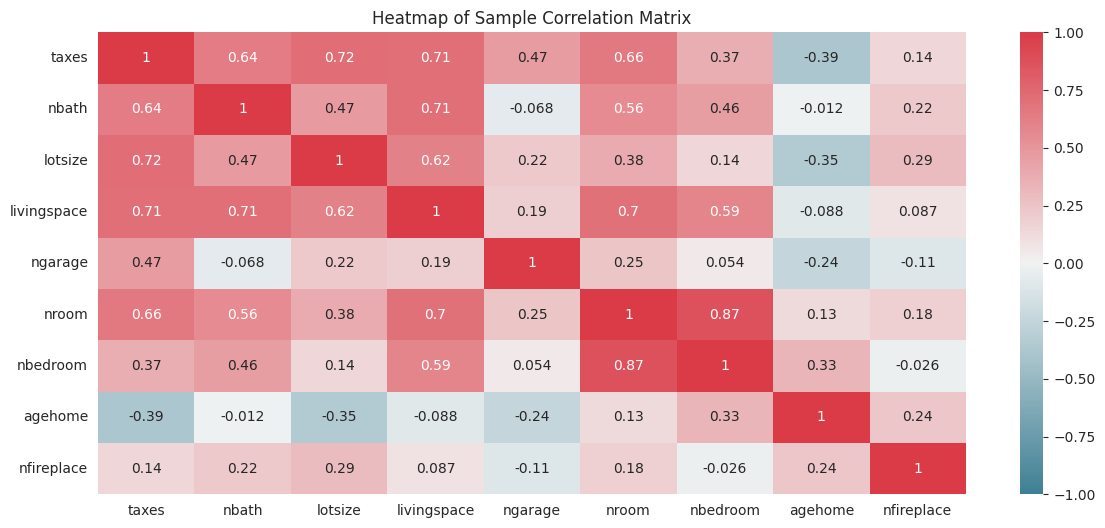

In [26]:
# generate heatmap
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.rcParams['figure.figsize'] = [14, 6]

bluetored = sns.diverging_palette(220, 10, as_cmap=True)
# generate heatmap
sns.heatmap(bigR, cmap=bluetored, annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

We can suspect from features with a correlation coefficient **larger than 0.80** leading to multicollinearity. In this sense, we can say that `the number of bedrooms` and `the number of rooms` have a strong relationship with a magnitude of 0.87. (Note that
`taxes` and `lot size`;
`taxes` and `living space`;  and `number of baths` and `living space` pairs also have moderate correlation values, such as 0.72, 0.71, and 0.71, respectively).

### Variance Inflation Factors

Another simple measure of multicollinearity is inspection of `variance inflation factor` (VIF) for the $j$th feature, which is defined as:

$$
VIF_{j}=\frac{1}{1-R_{j}^{2}},
$$

where $j=1,2,\ldots,d$, and  $R_{j}^{2}$ is the `coefficient of determination` obtained from regressing $x_{j}$ on
the other remaining feature variables. 

Clearly, if $x_{j}$ is `nearly linearly dependent` on some of
the other regressors, then $R_{j}^{2}$ will be near unity and $
VIF_{j}$ will be `large`. 

VIFs larger
than 10 imply serious problems with multicollinearity. 

VIFs which are between 5-10 imply moderate problems with multicollinearity. 

Most regression software
computes and displays the $
VIF_{j}$. We are going to use the function [variance_inflation_factor](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html) function in Python's [statsmodels](https://www.statsmodels.org/stable/index.html) library.


In [8]:
import warnings
warnings.filterwarnings("ignore")

# calculating VIF for each feature

property_X_train["intercept"]=1 # add a column of 1's to the X df
property_X_train.head()

,taxes,nbath,lotsize,livingspace,ngarage,nroom,nbedroom,agehome,nfireplace,intercept
7,5.6,1.0,9.5,1.5,0,6,3,32,0,1
10,6.3,1.0,5.5,1.0,1,5,2,30,0,1
2,4.5,1.0,2.3,1.2,1,6,3,40,0,1
14,6.7,1.5,6.9,1.5,2,7,3,22,1,1
9,5.3,1.0,5.0,1.6,1,6,3,30,0,1


In [9]:
vif_df = pd.DataFrame() # create an empty data frame
vif_df["feature"] = property_X_train.columns  # attach a column named feature which involves feature names of X df
vif_df

,feature
0,taxes
1,nbath
2,lotsize
3,livingspace
4,ngarage
5,nroom
6,nbedroom
7,agehome
8,nfireplace
9,intercept


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df["VIF"] = 0  #attach VIF column

for i in range(len(property_X_train.columns)):

    vif_df.loc[i, 'VIF'] = variance_inflation_factor(property_X_train.values, i) #calculate VIF for each feature #ignore intercept row
    
vif_df

,feature,VIF
0,taxes,7.797976
1,nbath,3.184820
2,lotsize,2.877336
3,livingspace,3.766297
4,ngarage,1.959254
5,nroom,12.738511
6,nbedroom,9.977440
7,agehome,2.272692
8,nfireplace,1.960761
9,intercept,92.674231


In [11]:
#short way through list comprehension
#vif_df["VIF"] = 0
#vif_df["VIF"] = [variance_inflation_factor(property_X_train.values, i) for i in range(len(property_X_train.columns))]  #list comprehension   
#vif_df

In [12]:
vif_df.sort_values("VIF", ascending=False, inplace=True) #ignore intercept row  in the below table    
vif_df

,feature,VIF
9,intercept,92.674231
5,nroom,12.738511
6,nbedroom,9.977440
0,taxes,7.797976
3,livingspace,3.766297
1,nbath,3.184820
2,lotsize,2.877336
7,agehome,2.272692
8,nfireplace,1.960761
4,ngarage,1.959254


We can see that VIF value of `the number of rooms` is greater than 10. Let's remove it from the model and recalculate the VIF values for the remaining features. 

In [13]:
Xnew = property_X_train.drop(columns=["nroom"], axis=1)
Xnew.head()

,taxes,nbath,lotsize,livingspace,ngarage,nbedroom,agehome,nfireplace,intercept
7,5.6,1.0,9.5,1.5,0,3,32,0,1
10,6.3,1.0,5.5,1.0,1,2,30,0,1
2,4.5,1.0,2.3,1.2,1,3,40,0,1
14,6.7,1.5,6.9,1.5,2,3,22,1,1
9,5.3,1.0,5.0,1.6,1,3,30,0,1


In [14]:
vifnew_df = pd.DataFrame() # create an empty data frame
vifnew_df["feature"] = Xnew.columns  # attach a column of involving feature names
vifnew_df["VIF"] = [variance_inflation_factor(Xnew.values, i) for i in range(len(Xnew.columns))]  #list comprehension 
vifnew_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row  in the below table
vifnew_df

,feature,VIF
8,intercept,48.323627
0,taxes,5.986331
3,livingspace,3.756955
1,nbath,3.131769
2,lotsize,2.829607
5,nbedroom,2.421409
6,agehome,2.254288
4,ngarage,1.932666
7,nfireplace,1.489105


We can also see that VIF value of `taxes` is greater than 5. Let's remove it from the model and recalculate the VIF values for the remaining features.  

In [15]:
Xnew2 = Xnew.drop(columns=["taxes"], axis=1)
Xnew2.head()

,nbath,lotsize,livingspace,ngarage,nbedroom,agehome,nfireplace,intercept
7,1.0,9.5,1.5,0,3,32,0,1
10,1.0,5.5,1.0,1,2,30,0,1
2,1.0,2.3,1.2,1,3,40,0,1
14,1.5,6.9,1.5,2,3,22,1,1
9,1.0,5.0,1.6,1,3,30,0,1


In [16]:
vifnew2_df = pd.DataFrame() # create an empty data frame
vifnew2_df["feature"] = Xnew2.columns  # attach a column of involving feature names
vifnew2_df["VIF"] = [variance_inflation_factor(Xnew2.values, i) for i in range(len(Xnew2.columns))]  #list comprehension 
vifnew2_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row 
vifnew2_df

,feature,VIF
7,intercept,46.863374
2,livingspace,3.730967
1,lotsize,2.385059
0,nbath,2.309010
4,nbedroom,2.187035
5,agehome,1.780221
6,nfireplace,1.445818
3,ngarage,1.209131


The remaning features `livingspace`, `lotsize`, `nbath`,  `nbedroom`,  `agehome`, `nfireplace`, and `ngarage` 
have a VIF value less than 5.
Feature selection is usually best performed by removing one feature at a time. This ensures that any information loss is minimized. 

In [17]:
# Generate the new subsets based on the selected features

#remove intercept
property_X_train = property_X_train.drop(columns=['intercept'], axis=1)

property_X_train_fs = property_X_train.drop(columns=['nroom', 'taxes'], axis=1)   #property_X_train[['livingspace', 'lotsize', 'nbath', 'nbedroom', 'agehome',  'nfireplace','ngarage']] #not a smart way
property_X_test_fs = property_X_test.drop(columns=['nroom', 'taxes'], axis=1)    #property_X_test[['livingspace', 'lotsize', 'nbath', 'nbedroom', 'agehome',  'nfireplace','ngarage']]

In [18]:
print(property_X_train_fs.shape)  #acceptable data format by sckitlearn
print(property_X_test_fs.shape)

(21, 7)
(3, 7)


In [19]:
#Model fitting with scikit-learn
from sklearn.linear_model import LinearRegression

# making predictions with regression models for both datasets

# without feature selection
lr = LinearRegression()
lr.fit(property_X_train, property_y_train)
property_y_train_pred = lr.predict(property_X_train)
property_y_test_pred = lr.predict(property_X_test)

In [20]:
# with feature selection
lr_fs = LinearRegression()
lr_fs.fit(property_X_train_fs, property_y_train)
property_y_train_pred_fs = lr_fs.predict(property_X_train_fs)
property_y_test_pred_fs = lr_fs.predict(property_X_test_fs)

In [21]:
# Evaluate the models' predictive performances

from sklearn.metrics import mean_squared_error, r2_score

print('Train (without feature selection) R2: %.4f'
      % r2_score(property_y_train, property_y_train_pred))
print('Test (without feature selection) R2: %.4f'
      % r2_score(property_y_test, property_y_test_pred))

Train (without feature selection) R2: 0.8789
Test (without feature selection) R2: 0.7401


Removing highly correlated features decreased the disperancy between R2 train and R2 test,has increased the model's predictive performance.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print('Train (without feature selection) R2: %.4f'
      % r2_score(property_y_train, property_y_train_pred_fs))
print('Test (with feature selection) R2: %.4f'
      % r2_score(property_y_test, property_y_test_pred_fs))

Train (without feature selection) R2: 0.8603
Test (with feature selection) R2: 0.8134


## Remedies for Multicollinearity

- Drop one or more predictors from the model (as we have done today).
- More advanced: `Principal component analysis` or `ridge regression`.

## References

- Montgomery, D. C., Peck, E. A., and Vining, G. G. (2021). Introduction to linear regression analysis. John Wiley & Sons. (Chapter 10).
- https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
- https://en.wikipedia.org/wiki/Linear_independence
- https://people.stat.sc.edu/hansont/stat704/notes12.pdf

In [23]:
import session_info
session_info.show()